## **Diabetes Prediction:-**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### here we can see that our Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	value is 0 which is not posible it means it is replaced by it's mean,median ,mode values

In [6]:
df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

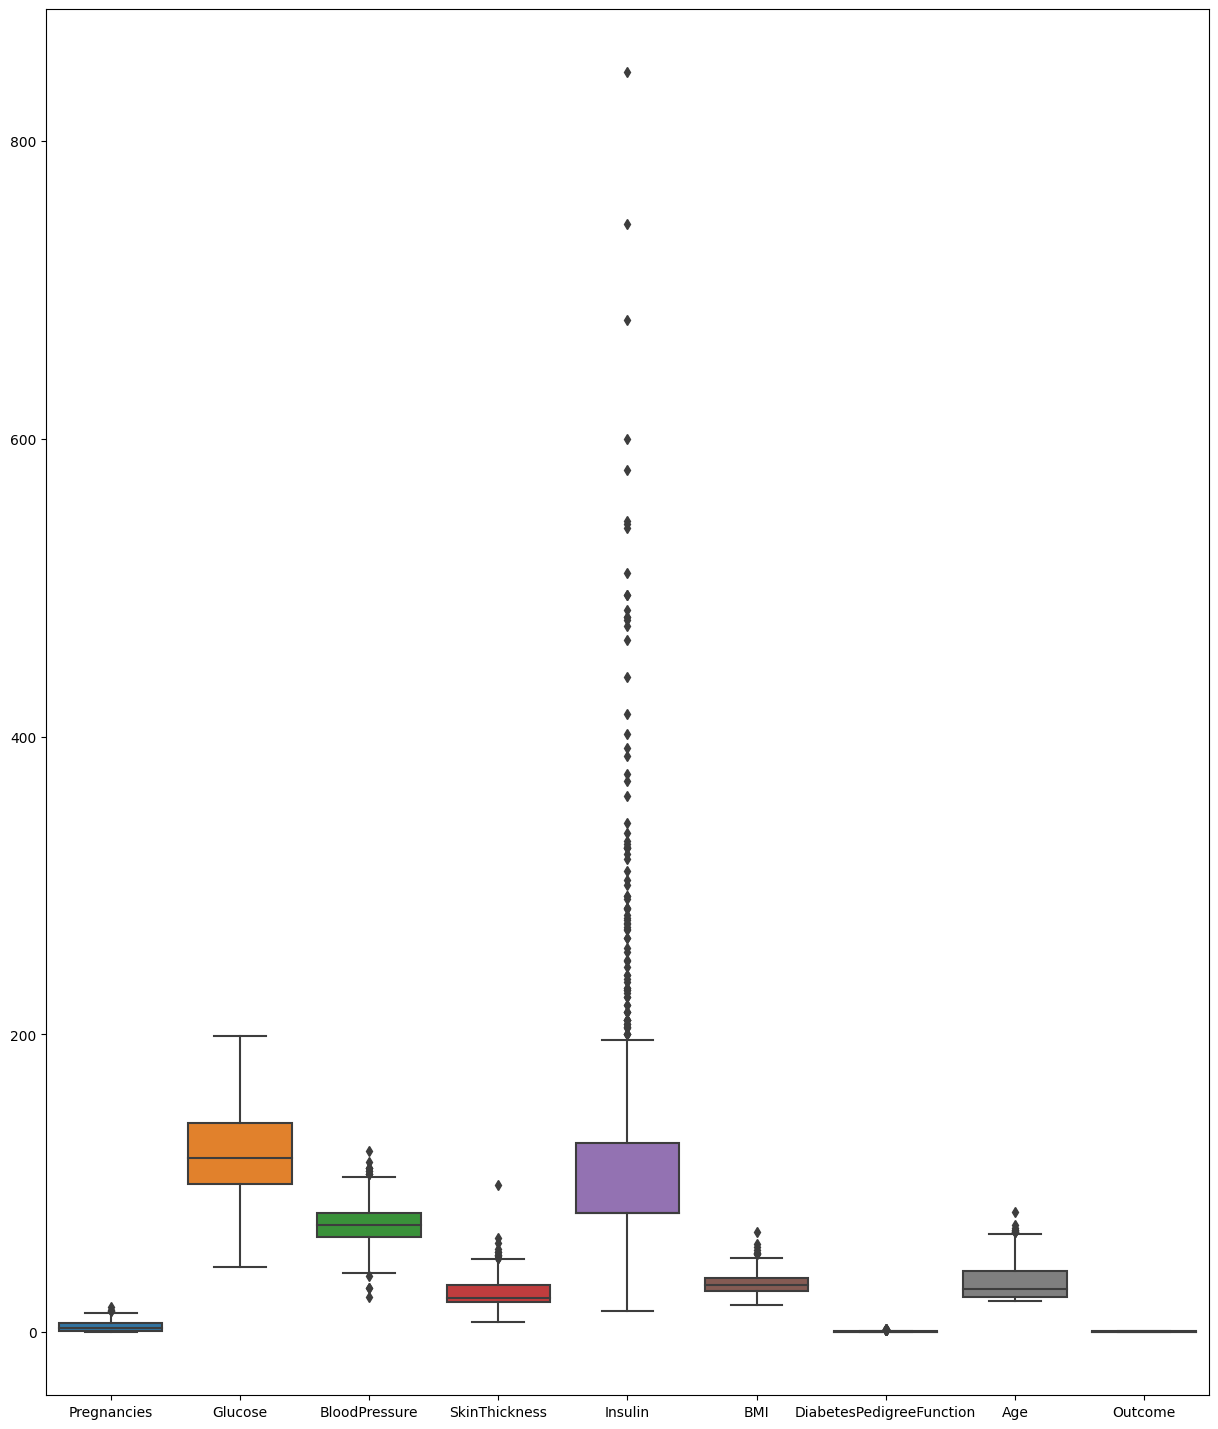

In [8]:
fig,ax=plt.subplots(figsize=(15,18))
sns.boxplot(df)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### **devide into Dependent and independent features:-**

In [10]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
x_train.shape,y_train.shape

((614, 8), (614,))

In [12]:
import pickle
#standard scling-standardzation
def scaler_standardzation(x_train,x_test):
    #scaling the data
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.fit_transform(x_test)
    # saving the model
    file=open("D:\PW-DATA SCIENCE\Week-15","wb")
    pickle.dump(scaler,file)
    file.close()
    return x_train_scaled,x_test_scaled

In [13]:
x_train_scaled,x_test_scaled=scaler_standardzation(x_train,x_test)

PermissionError: [Errno 13] Permission denied: 'D:\\PW-DATA SCIENCE\\Week-15'

In [14]:
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

NameError: name 'x_train_scaled' is not defined

In [15]:
## Hyperparameter Tuning
## GridsearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# parameter grid
parameter ={"penality":["l1","l2"],
            "C":np.logspace(-3,3,7),
            "solver":["newton_cg","lbfgs","liblinear"],
            
            }